## Leaf Diseases Caused by Fungi and Bacteria Classification

Fungi are the most common parasites causing plant disease. Most are microscopic (very small and can only be seen with the aid of a microscope) plants that feed on living green plants or on dead organic material. When they attack living plants, a disease results. Fungi usually produce spores which, when carried to a plant, can begin an infection. These spores may be carried from plant to plant by wind, water, insects and equipment. In order for fungus spores to begin new infections, adequate moisture and the right air temperature are required. A plant wound is sometimes also needed as an entry for the fungus. Fungus diseases are common during wet, humid seasons.

Bacteria are single-celled microscopic organisms. Some attack living plants and cause plant disease. Bacteria can be carried from plant to plant by wind, rain splash, insects and machinery.

These diseases occur primarily on leaves, but some may also occur on stems and/or fruit. Leaf diseases are the most common diseases of most plants. They are usually controlled with fungicides, bactericides and resistant varieties. Although leaf diseases are described under several different symptom types, keep in mind that differences are not always clear-cut and there are many names for leaf diseases other than those given, a situation which can be confusing.

#### 1- Leaf Spots
Leaf spots (other names: anthracnose, scab, leaf blotch, shot hole) are usually rather definite spots of varying sizes, shapes and colors. There is nearly always a distinctive margin. Sometimes the spot, which may be caused by bacteria or fungi, is surrounded by a yellow halo. If caused by a fungus, there is nearly always fungus growth of some type in the spot, particularly in damp weather. This fungus growth may be tiny pimple-like structures, often black in color, or a moldy growth of spores. It is often necessary to use a hand lens or a microscope to see these structures. If the spots are numerous or close together, diseased areas may join together to form irregular areas called "blotches." The common names of leaf spot diseases may be general, such as bacterial leaf spot; descriptive, such as frog-eye leaf spot; or named after the fungus, such as Septoria leaf spot.

#### 2- Leaf Blights
Leaf blights are generally larger diseased areas than leaf spots and more irregularly shaped. Sometimes the "blighting" appearance of leaves is the result of the coalescence of numerous small spots. Usually the common name includes the word "blight" such as Southern corn leaf blight or early blight.

#### 3- Rusts
Rusts often produce spots similar to leaf spots, but the spots are called "pustules." Rust pustules are bright yellow, orange-red, reddish-brown or black in color. The pustules are usually raised above the leaf surface, and, when rubbed with a white cloth, a colored deposit the same color as the pustule can usually be seen on the cloth. In severe cases, the leaf withers and dies rapidly. Some types of rust also occur on stems. Rusts are common on grains and grasses.

#### 4- Powdery Mildew
Powdery mildew is a superficial, white to light grayish, powdery to mealy growth on leaves, but may also occur on stems and flowers. Affected leaves usually turn yellow, wither and die rapidly. The problem is common on cucurbit-type vegetables and on small grains.

#### 5- Downy Mildew
Downy mildew symptoms are pale yellow green to yellow areas on the upper leaf surface; light gray to purplish moldy growth on the under surface of the leaf. Blue mold of tobacco is a downy mildew disease. Deformed plant growth ("crazy top") may result from downy mildew as in the case of sorghum downy mildew of corn or grain sorghum.

## Objective:
Build a model able to differentiate the different types of plant diseases. This will facilitate their identification for later treatment. 

In [29]:
# !pip install duckduckgo-search fastcore fastdownload fastai

In [30]:
# !pip install duckduckgo-search 

In [31]:
# !pip install fastcore

In [32]:
# !pip install fastdownload

In [33]:
# !pip install fastai

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

## Process:

1. Download images:
- Use DuckDuckGo to search for images of "Leaf Spots"
- Use DuckDuckGo to search for images of "Leaf Blights"
- Use DuckDuckGo to search for images of "Rusts"
- Use DuckDuckGo to search for images of "Powdery Mildew"
- Use DuckDuckGo to search for images of "Downy Mildew"
2. Fine-tune a pretrained neural network to recognize these groups.
3. Clean downloaded data.
4. Re train our model.
5. Try running this model on a new set of pictures and see if it works.
6. Save our model for future inference. 

## Step 1: Download images of the diseases

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Let's start by searching for a bird photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [4]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('Leaf Spots', max_images=1)
urls[0]

Searching for 'Leaf Spots'


'https://shadesofgreenlawncare.com/wp-content/uploads/2019/05/leaf-spots.jpg'

...and then download a URL and take a look at it:

#### Leaf Spots

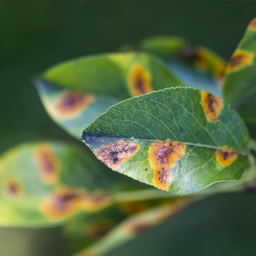

In [7]:
from fastdownload import download_url
dest = 'Leaf_Spots.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with the other diseases: "Leaf Blights", "Rusts", "Powdery Mildew" and "Downy Mildew".

### Healthy Leaf

Searching for 'Leaf'


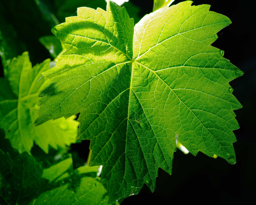

In [8]:
download_url(search_images('Leaf', max_images=1)[0], 'Healthy_Leaf.jpg', show_progress=False)
Image.open('Healthy_Leaf.jpg').to_thumb(256,256)

#### Leaf Blights

Searching for 'Leaf Blights'


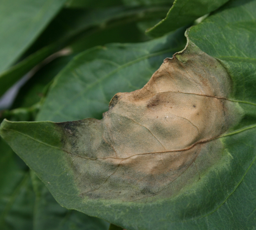

In [10]:
download_url(search_images('Leaf Blights', max_images=1)[0], 'Leaf_Blights.jpg', show_progress=False)
Image.open('Leaf_Blights.jpg').to_thumb(256,256)

#### Rusts

Searching for 'Leaf Rusts'


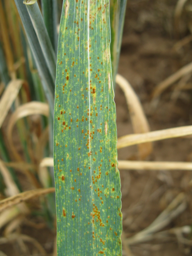

In [11]:
download_url(search_images('Leaf Rusts', max_images=1)[0], 'Rusts.jpg', show_progress=False)
Image.open('Rusts.jpg').to_thumb(256,256)

#### Powdery Mildew

Searching for 'Powdery Mildew'


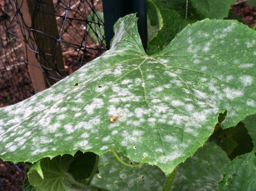

In [12]:
download_url(search_images('Powdery Mildew', max_images=1)[0], 'Powdery_Mildew.jpg', show_progress=False)
Image.open('Powdery_Mildew.jpg').to_thumb(256,256)

#### Downy Mildew

Searching for 'Downy Mildew'


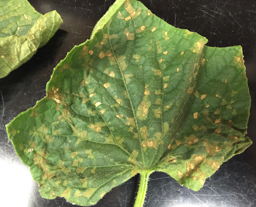

In [13]:
download_url(search_images('Downy Mildew', max_images=1)[0], 'Downy_Mildew.jpg', show_progress=False)
Image.open('Downy_Mildew.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "bird" and "forest" photos, and save each group of photos to a different folder (I'm also trying to grab a range of lighting conditions here):

In [14]:
searches =  "Leaf", "Leaf Spots","Leaf Blights","Leaf Rusts","Powdery Mildew", "Downy Mildew"
path = Path('disease')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=500, dest=path/o)

Searching for 'Leaf photo'
Searching for 'Leaf sun photo'
Searching for 'Leaf shade photo'
Searching for 'Leaf Spots photo'
Searching for 'Leaf Spots sun photo'
Searching for 'Leaf Spots shade photo'
Searching for 'Leaf Blights photo'
Searching for 'Leaf Blights sun photo'
Searching for 'Leaf Blights shade photo'
Searching for 'Leaf Rusts photo'
Searching for 'Leaf Rusts sun photo'
Searching for 'Leaf Rusts shade photo'
Searching for 'Powdery Mildew photo'
Searching for 'Powdery Mildew sun photo'
Searching for 'Powdery Mildew shade photo'
Searching for 'Downy Mildew photo'
Searching for 'Downy Mildew sun photo'
Searching for 'Downy Mildew shade photo'


## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [15]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

20

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

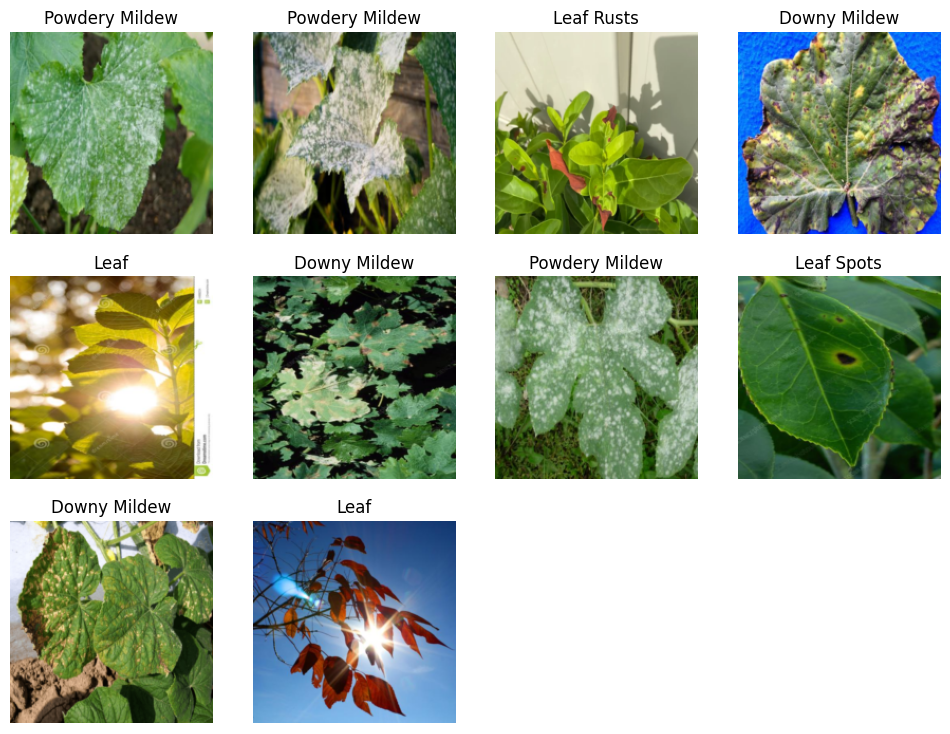

In [16]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=10)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "Leaf","Leaf Spots","Leaf Blights","Leaf Rusts","Powdery Mildew" or "Downy Mildew").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be "Leaf","Leaf Spots","Leaf Blights","Leaf Rusts","Powdery Mildew" or "Downy Mildew").

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

C:\Users\marti\anaconda3\envs\dl4c\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\marti\anaconda3\envs\dl4c\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.432441,1.132849,0.393617,00:37


epoch,train_loss,valid_loss,error_rate,time
0,1.024372,0.907113,0.276596,00:52
1,0.783510,0.915557,0.223404,00:53
2,0.599409,0.925115,0.218085,00:54
3,0.436389,0.933212,0.207447,00:54
4,0.338179,0.911704,0.223404,00:54


#### Confusion matrix

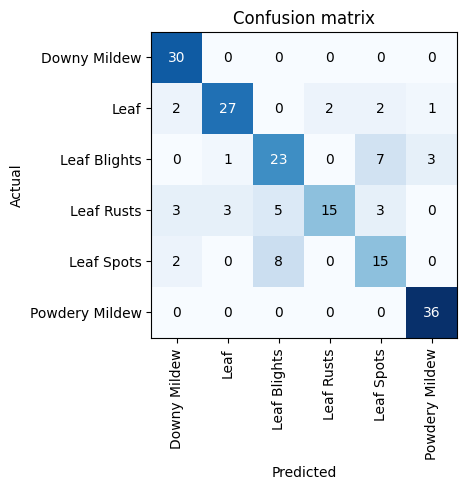

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

It very difficult to differentiate:
* Blights from Spots

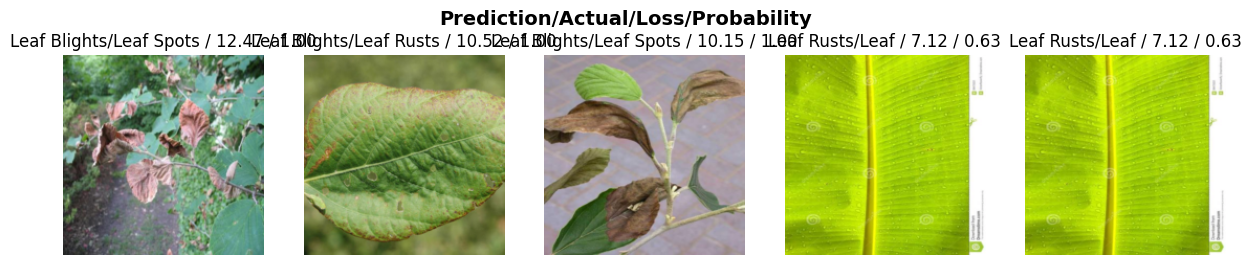

In [19]:
interp.plot_top_losses(5, nrows=1)

## Step 3: Clean the data

In [21]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [22]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

## Step 4: Re train our model

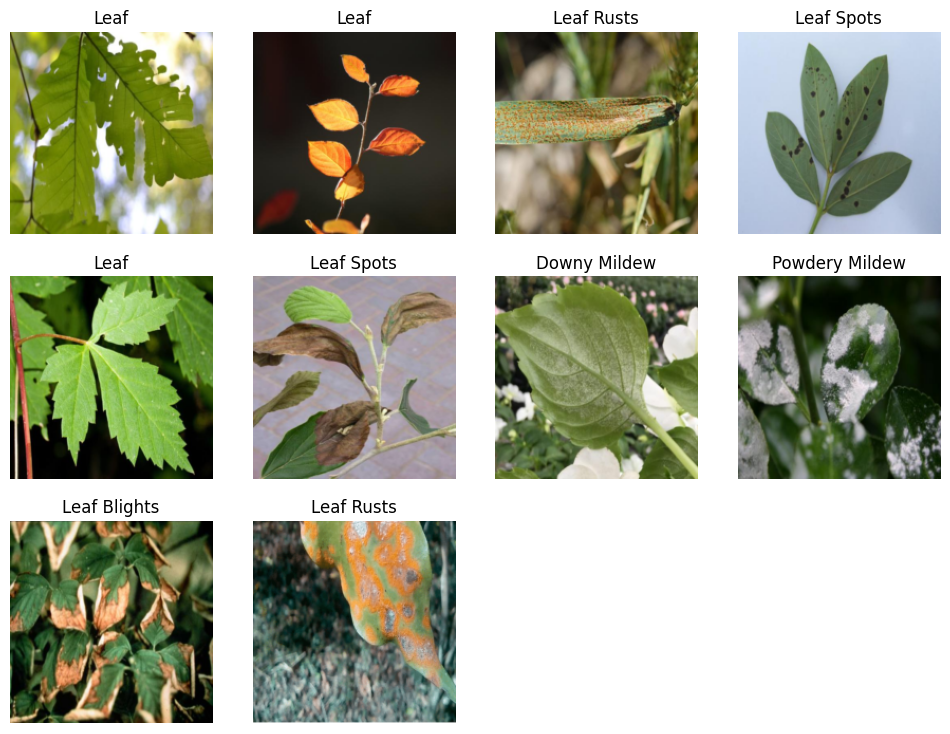

In [23]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=10)

In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.510720,1.359775,0.465241,00:40


epoch,train_loss,valid_loss,error_rate,time
0,1.158792,0.970006,0.347594,00:58
1,0.849658,0.855769,0.251337,00:58
2,0.593587,0.853849,0.219251,01:00
3,0.434145,0.911743,0.262032,01:01
4,0.353804,0.899638,0.267380,01:01


In [26]:
# Predict an image:
learn.predict('Healthy_Leaf.jpg')

('Leaf',
 TensorBase(1),
 TensorBase([4.5269e-02, 9.5322e-01, 4.0176e-05, 6.7179e-05, 1.3662e-03,
             3.3586e-05]))

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model

Let's see what our model thinks about the leafs we downloaded at the start:

### Healthy Leaf

In [27]:
# Watch the output and extract the parts I am interested in. 
learn.predict("Healthy_Leaf.jpg")

('Leaf',
 TensorBase(1),
 TensorBase([4.5269e-02, 9.5322e-01, 4.0176e-05, 6.7179e-05, 1.3662e-03,
             3.3586e-05]))

In [28]:
is_leaf,a,probs=learn.predict("Healthy_Leaf.jpg")
print(f"This is a: {is_leaf}.")
print(f"Probability: {probs[1]:.4f}")

This is a: Leaf.
Probability: 0.9532


### Leaf Spots 

In [29]:
is_leaf,_,probs = learn.predict('Leaf_Spots.jpg')
print(f"This is a: {is_leaf}.")
print(f"Probability: {probs[4]:.4f}")

This is a: Leaf Spots.
Probability: 0.9999


### Leaf Blights 

In [30]:
is_leaf,_,probs = learn.predict('Leaf_Blights.jpg')
print(f"This is a: {is_leaf}.")
print(f"Probability: {probs[2]:.4f}")

This is a: Leaf Blights.
Probability: 0.9985


### Leaf Rusts 

In [31]:
is_leaf,_,probs = learn.predict('Rusts.jpg')
print(f"This is a: {is_leaf}.")
print(f"Probability: {probs[3]:.4f}")

This is a: Leaf Rusts.
Probability: 0.9998


### Powdery Mildew

In [32]:
is_leaf,_,probs = learn.predict('Powdery_Mildew.jpg')
print(f"This is a: {is_leaf}.")
print(f"Probability: {probs[5]:.4f}")

This is a: Powdery Mildew.
Probability: 0.9997


 ### Downy Mildew

In [33]:
learn.predict('Downy_Mildew.jpg')

('Downy Mildew',
 TensorBase(0),
 TensorBase([9.9952e-01, 7.6260e-06, 1.3010e-04, 1.3387e-04, 5.5663e-05,
             1.5400e-04]))

In [34]:
is_leaf,_,probs = learn.predict('Downy_Mildew.jpg')
print(f"This is a: {is_leaf}.")
print(f"Probability: {probs[0]:.4f}")

This is a: Downy Mildew.
Probability: 0.9995


## Export the model

In [35]:
learn.export('model.pkl')

Good job, resnet18. :)

This problem highlights the applicability of artificial intelligence to solve problems related to the detection of leaf diseases, a field of vital importance in agriculture. 